In [10]:
from datasets import get_german, get_titanic, get_breast_cancer, get_wine, prep_data
from evaluate import my_accuracy_score
from utils_across import get_original_model, get_modified_model
import tensorflow as tf
import numpy as np
#from experiments import plot_ranking_histogram, plot_ranking_histogram2
from experiments import get_rankings, get_rankings_other

In [ ]:
import matplotlib.pyplot as plt
def plot_histogram2(get_dataset, rankings, idx, modified, epochs=50, fig_title='fig.png', **kwargs):
    Xtr, _, _, _ = get_dataset()
    color = 'mediumseagreen'
    if not modified:
        color = 'royalblue'
    fig = plt.figure()
    plt.ylim([0, epochs])
    plt.xlabel('ranking', fontsize=15)
    plt.ylabel('number of times', fontsize= 15)
    plt.hist(rankings, bins=Xtr.shape[1], range=(1, Xtr.shape[1]), color=color)
    plt.savefig(fig_title, dpi=300)

< original model >
>>> average accuracy : 0.8147000000000001


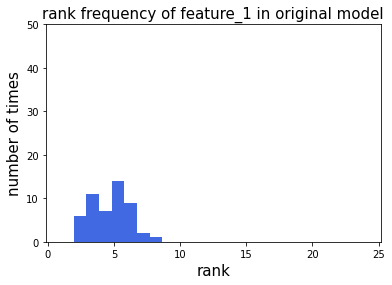

In [2]:
%matplotlib inline
plot_ranking_histogram(get_german, 1, epochs=50, test_index=6)

< original model >
>>> average accuracy : 0.8151000000000002


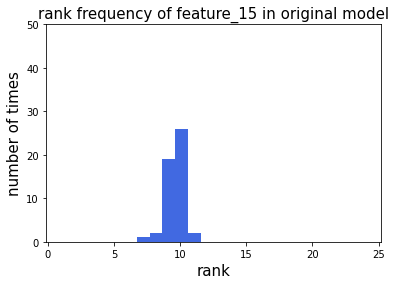

In [3]:
%matplotlib inline
plot_ranking_histogram(get_german, 15, epochs=50, test_index=6)

< modified model >
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
>>> average accuracy : 0.8022


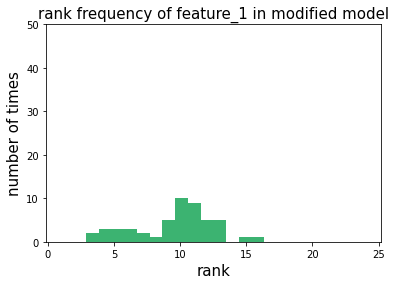

In [2]:
%matplotlib inline
targets = [[1, 1], [15, -1]]
plot_ranking_histogram(get_german, 1, targets=targets, epochs=50, test_index=6)

< modified model >
>>> average accuracy : 0.8056


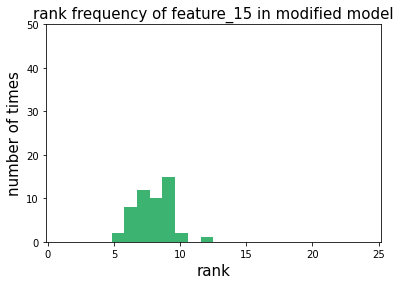

In [3]:
%matplotlib inline
plot_ranking_histogram(get_german, 15, targets=targets, epochs=50, test_index=6)

# titanic

< original model >
>>> average accuracy : 0.7835754189944137


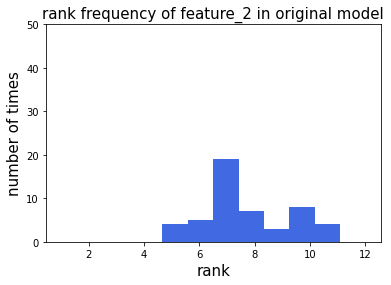

In [2]:
%matplotlib inline
plot_ranking_histogram(get_titanic, 2, epochs=50, text_index=3)

< original model >
>>> average accuracy : 0.7772067039106146


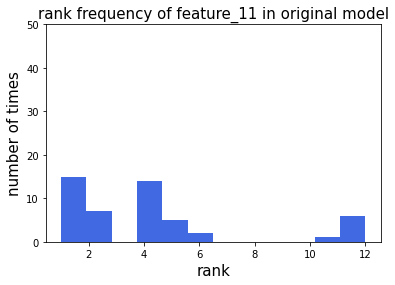

In [3]:
%matplotlib inline
plot_ranking_histogram(get_titanic, 11, epochs=50, text_index=3)

< modified model >
>>> average accuracy : 0.7796648044692741


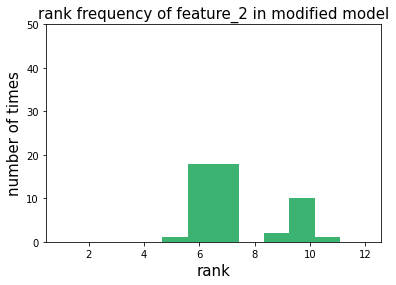

In [4]:
%matplotlib inline
targets = [[2, -1], [11, 1]]
plot_ranking_histogram(get_titanic, 2, targets=targets, epochs=50, text_index=3)

< modified model >
>>> average accuracy : 0.780446927374302


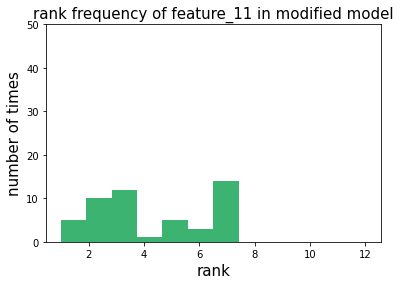

In [8]:
%matplotlib inline
targets = [[2, -1], [11, 1]]
plot_ranking_histogram(get_titanic, 11, targets=targets, epochs=50, text_index=3)

# breast_cancer

< original model >
>>> average accuracy : 0.9763157894736837
>>> average ranking : 12.4


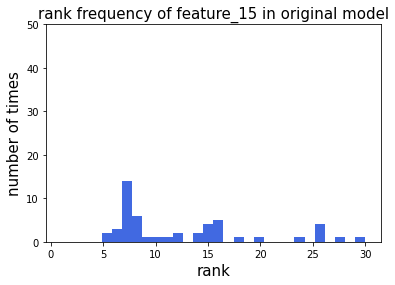

In [2]:
%matplotlib inline
plot_ranking_histogram(get_breast_cancer, 15, epochs=50, test_index=8)

< original model >
>>> average accuracy : 0.9761403508771926
>>> average ranking : 19.56


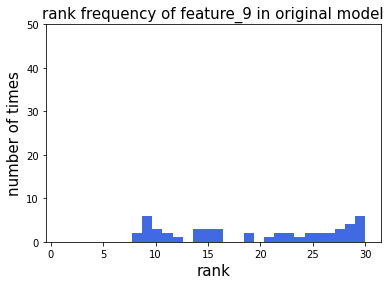

In [3]:
%matplotlib inline
plot_ranking_histogram(get_breast_cancer, 9, epochs=50, test_index=8)

< modified model >
>>> average accuracy : 0.9619298245614029
>>> average ranking : 11.92


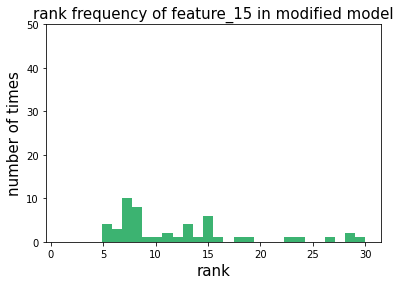

In [4]:
%matplotlib inline
targets = [[15, 1], [9, -1]]
plot_ranking_histogram(get_breast_cancer, 15, targets=targets, epochs=50, test_index=8)

< modified model >
>>> average accuracy : 0.9661403508771923
>>> average ranking : 20.6


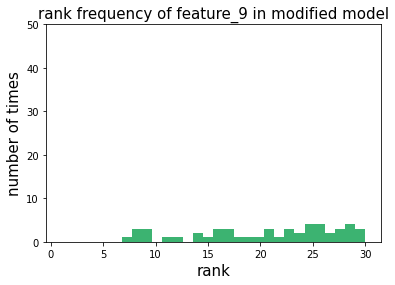

In [5]:
%matplotlib inline
plot_ranking_histogram(get_breast_cancer, 9, targets=targets, epochs=50, test_index=8)

In [9]:
rankings_ori, rankings_mod = get_rankings(get_breast_cancer,
                                          target_index=8,
                                          epochs=50,
                                          alpha=0.1,
                                          batch_size=100,
                                          epochs_adv=100,
                                          lr=0.01,
                                          targets=[[17, 1], [1, -1]])

##################################################
mean accuracy of original model : 0.9778947368421048
mean accuracy of modified model : 0.9626315789473678


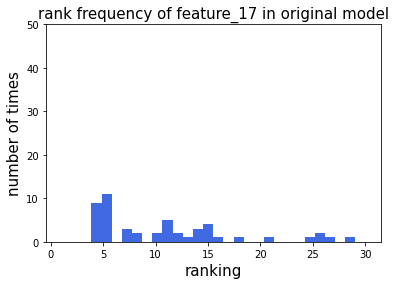

In [10]:
plot_histogram(get_breast_cancer,
              rankings = rankings_ori[0],
              idx = 17,
              modified = False)

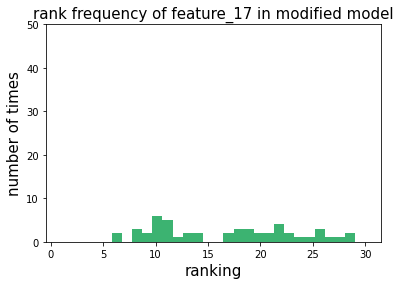

In [11]:
plot_histogram(get_breast_cancer,
              rankings = rankings_mod[0],
              idx = 17,
              modified = True)

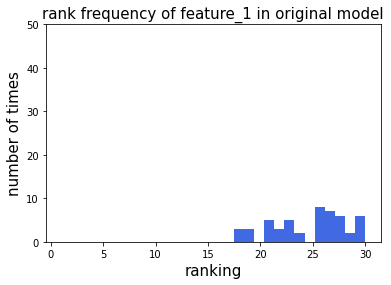

In [12]:
plot_histogram(get_breast_cancer,
              rankings = rankings_ori[1],
              idx = 1,
              modified = False)

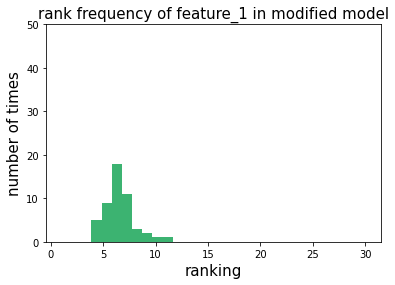

In [13]:
plot_histogram(get_breast_cancer,
              rankings = rankings_mod[1],
              idx = 1,
              modified = True)

In [70]:
rankings_ori, rankings_mod = get_rankings(get_breast_cancer,
                                          target_index=8,
                                          epochs=50,
                                          alpha=0.1,
                                          batch_size=100,
                                          epochs_adv=100,
                                          lr=0.01,
                                          targets=[[0, 1], [1, -1]])

##########10##########20##########30##########40##########50
mean accuracy of original model : 0.9738596491228065
mean accuracy of modified model : 0.9721052631578943


>>> mean ranking : 4.88


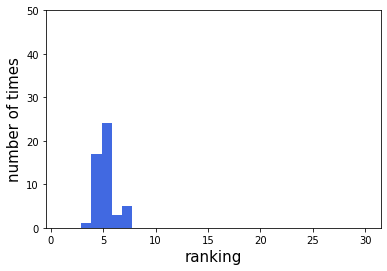

In [71]:
print(">>> mean ranking : " + str(sum(rankings_ori[0])/len(rankings_ori[0])))
plot_histogram2(get_breast_cancer,
              rankings = rankings_ori[0],
              idx = 0,
              modified = False,
              fig_title='breast_ori_A.png' )

>>> mean ranking : 13.0


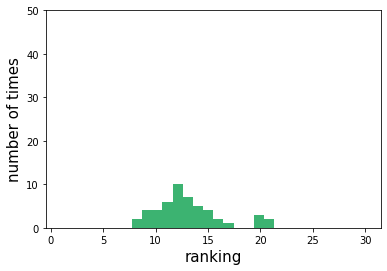

In [72]:
print(">>> mean ranking : " + str(sum(rankings_mod[0])/len(rankings_mod[0])))
plot_histogram2(get_breast_cancer,
              rankings = rankings_mod[0],
              idx = 0,
              modified = True,
              fig_title='breast_mod_A.png' )

>>> mean ranking : 23.82


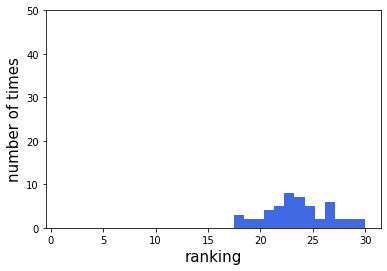

In [73]:
print(">>> mean ranking : " + str(sum(rankings_ori[1])/len(rankings_ori[1])))
plot_histogram2(get_breast_cancer,
              rankings = rankings_ori[1],
              idx = 1,
              modified = False,
              fig_title='breast_ori_B.png' )

>>> mean ranking : 5.5


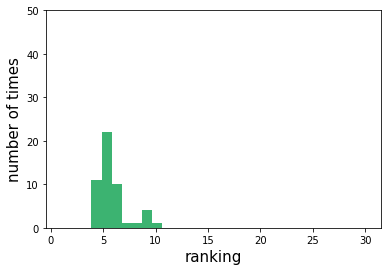

In [74]:
print(">>> mean ranking : " + str(sum(rankings_mod[1])/len(rankings_mod[1])))
plot_histogram2(get_breast_cancer,
              rankings = rankings_mod[1],
              idx = 1,
              modified = True,
              fig_title='breast_mod_B.png' )

In [3]:
rankings_ori, rankings_mod = get_rankings(get_wine,
                                          target_index=8,
                                          epochs=50,
                                          alpha=0.1,
                                          batch_size=200,
                                          epochs_adv=100,
                                          lr=0.001,
                                          targets=[[6, 1], [11, -1]])

##########10##########20##########30##########40##########50
mean accuracy of original model : 0.8288888888888886
mean accuracy of modified model : 0.7911111111111109


>>> mean ranking : 4.22


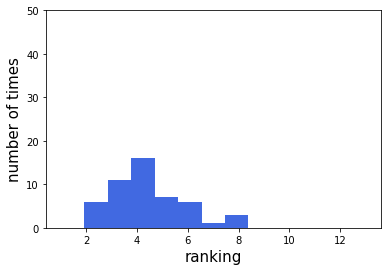

In [28]:
print(">>> mean ranking : " + str(sum(rankings_ori[0])/len(rankings_ori[0])))
plot_histogram2(get_wine,
              rankings = rankings_ori[0],
              idx = 6,
              modified = False)

>>> mean ranking : 11.54


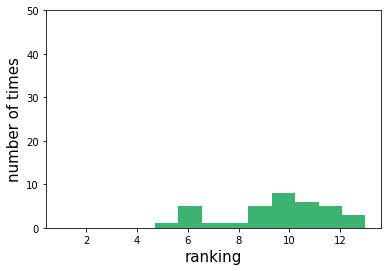

In [29]:
print(">>> mean ranking : " + str(sum(rankings_mod[0])/len(rankings_mod[0])))
plot_histogram2(get_wine,
              rankings = rankings_mod[0],
              idx = 6,
              modified = True)

>>> mean ranking : 9.56


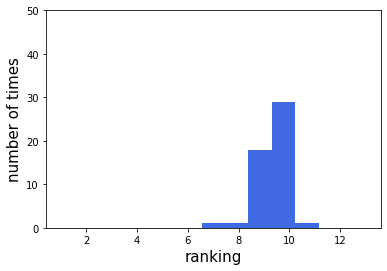

In [30]:
print(">>> mean ranking : " + str(sum(rankings_ori[1])/len(rankings_ori[1])))
plot_histogram2(get_wine,
              rankings = rankings_ori[1],
              idx = 11,
              modified = False)

>>> mean ranking : 7.24


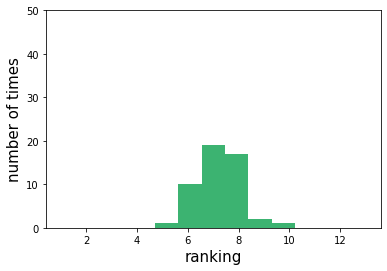

In [31]:
print(">>> mean ranking : " + str(sum(rankings_mod[1])/len(rankings_mod[1])))
plot_histogram2(get_wine,
              rankings = rankings_mod[1],
              idx = 11,
              modified = True)

# German

In [12]:
rankings_ori, rankings_mod = get_rankings(get_german,
                                          target_index=6,
                                          epochs=50,
                                          alpha=0.1,
                                          batch_size=200,
                                          epochs_adv=100,
                                          lr=0.01,
                                          targets=[[1, 1], [15, -1]])

##########10##########20##########30##########40##########50
mean accuracy of original model : 0.8132
mean accuracy of modified model : 0.7977000000000004


>>> mean ranking : 4.22


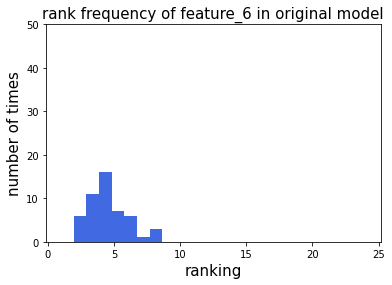

In [47]:
print(">>> mean ranking : " + str(sum(rankings_ori[0])/len(rankings_ori[0])))
plt = plot_histogram(get_german,
              rankings = rankings_ori[0],
              idx = 6,
              modified = False)


>>> mean ranking : 11.54


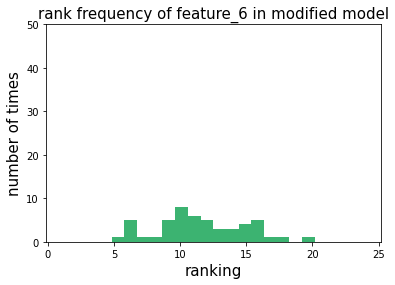

In [14]:
print(">>> mean ranking : " + str(sum(rankings_mod[0])/len(rankings_mod[0])))
plot_histogram(get_german,
              rankings = rankings_mod[0],
              idx = 6,
              modified = True)

>>> mean ranking : 9.56


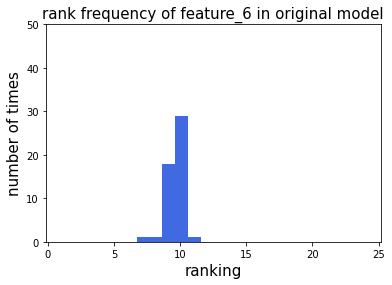

In [16]:
print(">>> mean ranking : " + str(sum(rankings_ori[1])/len(rankings_ori[1])))
plot_histogram(get_german,
              rankings = rankings_ori[1],
              idx = 6,
              modified = False)

>>> mean ranking : 7.24


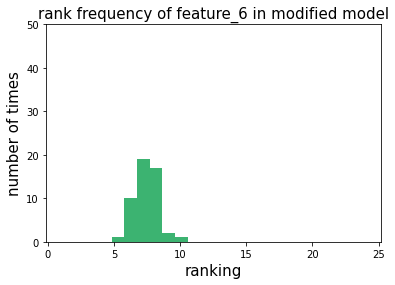

In [19]:
print(">>> mean ranking : " + str(sum(rankings_mod[1])/len(rankings_mod[1])))
plot_histogram(get_german,
              rankings = rankings_mod[1],
              idx = 6,
              modified = True)

In [8]:
rankings_ori_g2, rankings_mod_g2 = get_rankings(get_german,
                                          target_index=6,
                                          epochs=50,
                                          alpha=0.1,
                                          batch_size=200,
                                          epochs_adv=100,
                                          lr=0.01,
                                          targets=[[1, 1], [21, -1]])

##########10##########20##########30##########40##########50
mean accuracy of original model : 0.8141000000000002
mean accuracy of modified model : 0.8017


>>> mean ranking : 4.18


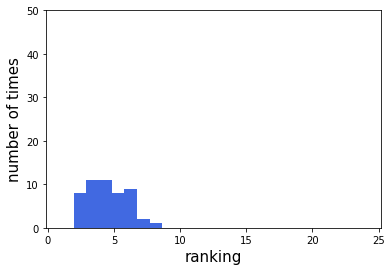

In [21]:
print(">>> mean ranking : " + str(sum(rankings_ori_g2[0])/len(rankings_ori_g2[0])))
plt = plot_histogram2(get_german,
              rankings = rankings_ori_g2[0],
              idx = 6,
              modified = False,
              fig_title='german_ori_A.png')

In [22]:
print(">>> mean ranking : " + str(sum(rankings_mod_g2[0])/len(rankings_mod_g2[0])))
plt = plot_histogram2(get_german,
              rankings = rankings_mod_g2[0],
              idx = 6,
              modified = True,
              fig_title='german_mod_A.png')

>>> mean ranking : 12.52


AttributeError: 'NoneType' object has no attribute 'figure'

>>> mean ranking : 20.86


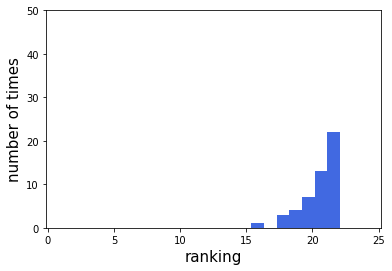

In [19]:
print(">>> mean ranking : " + str(sum(rankings_ori_g2[1])/len(rankings_ori_g2[1])))
plot_histogram2(get_german,
              rankings = rankings_ori_g2[1],
              idx = 6,
              modified = False)

>>> mean ranking : 3.38


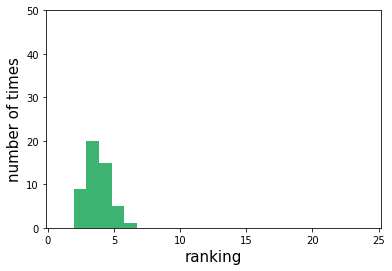

In [20]:
print(">>> mean ranking : " + str(sum(rankings_mod_g2[1])/len(rankings_mod_g2[1])))
plot_histogram2(get_german,
              rankings = rankings_mod_g2[1],
              idx = 6,
              modified = True)

### German Credit "Side Effects"

In [2]:
rankings_ori, rankings_mod = get_rankings_other(get_german,
                                                  target_index=6,
                                                  epochs=50,
                                                  alpha=0.1,
                                                  batch_size=200,
                                                  epochs_adv=100,
                                                  lr=0.01,
                                                  feature_index = 21,
                                                  targets=[[1, 1], [15, -1]])

##########10##########20##########30##########40##########50


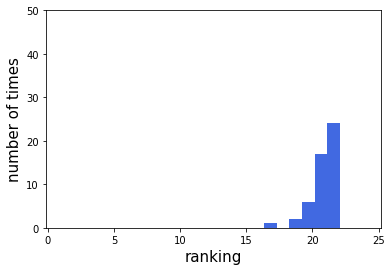

In [6]:
plot_histogram2(get_german, rankings=rankings_ori, modified=False, fig_title='side_effects_ori.png')

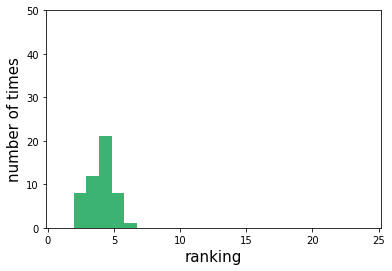

In [7]:
plot_histogram2(get_german, rankings=rankings_mod, modified=True, fig_title='side_effects_mod.png')

In [18]:
import matplotlib.pyplot as plt
def plot_histogram2(get_dataset, rankings, modified, epochs=50, fig_title='fig.png', **kwargs):
    Xtr, _, _, _ = get_dataset()
    color = 'mediumseagreen'
    if not modified:
        color = 'royalblue'
    fig = plt.figure()
    plt.ylim([0, epochs])
    plt.xlabel('ranking', fontsize=15)
    plt.ylabel('number of times', fontsize= 15)
    plt.hist(rankings, bins=Xtr.shape[1], range=(1, Xtr.shape[1]), color=color)
    plt.savefig(fig_title, dpi=300)

>>> mean ranking : 4.22


FileNotFoundError: [Errno 2] No such file or directory: 'figs/german/german_ori_A.png'

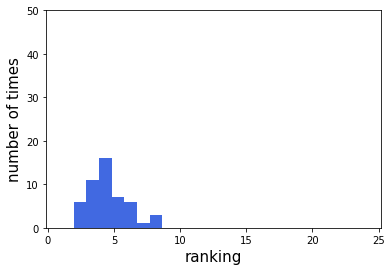

In [66]:
print(">>> mean ranking : " + str(sum(rankings_ori[0])/len(rankings_ori[0])))
plt = plot_histogram2(get_german,
              rankings = rankings_ori[0],
              idx = 6,
              modified = False,
              fig_title='figs/german/german_ori_A.png')

In [54]:
plt.savefig('german_ori_A.png', format='png', dpi=300)

<Figure size 432x288 with 0 Axes>

>>> mean ranking : 11.54


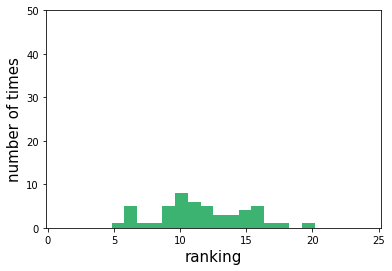

In [67]:
print(">>> mean ranking : " + str(sum(rankings_mod[0])/len(rankings_mod[0])))
plot_histogram2(get_german,
              rankings = rankings_mod[0],
              idx = 6,
              modified = True,
              fig_title='german_mod_A.png')

>>> mean ranking : 9.56


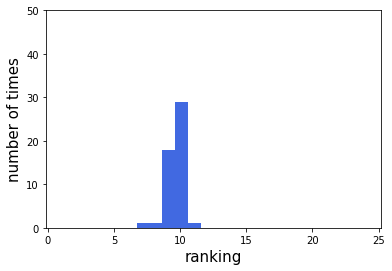

In [68]:
print(">>> mean ranking : " + str(sum(rankings_ori[1])/len(rankings_ori[1])))
plot_histogram2(get_german,
              rankings = rankings_ori[1],
              idx = 6,
              modified = False,
              fig_title='german_ori_B.png')

>>> mean ranking : 7.24


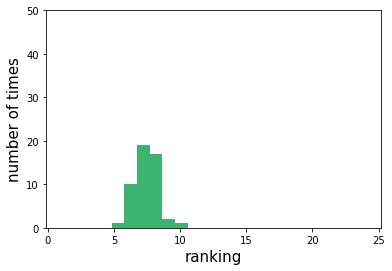

In [69]:
print(">>> mean ranking : " + str(sum(rankings_mod[1])/len(rankings_mod[1])))
plot_histogram2(get_german,
              rankings = rankings_mod[1],
              idx = 6,
              modified = True,
              fig_title='german_mod_B.png')